In [52]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [53]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','univorm_cell_size','uniform_cell_shape', 'marginal_adhesion','single_epithelial_size','bare_nuclei', 'bland_chromatin','normal_nucleoli','mitoses','classes']
df = pd.read_csv(url,names=names)

In [54]:
df.head()

,id,clump_thickness,univorm_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [55]:
df.replace('?',-9999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace = True)

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'classes'],
      dtype='object')]
(699, 10)


In [56]:
print(df.loc[0])
print(df.describe())

clump_thickness           5
univorm_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
classes                   2
Name: 0, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.

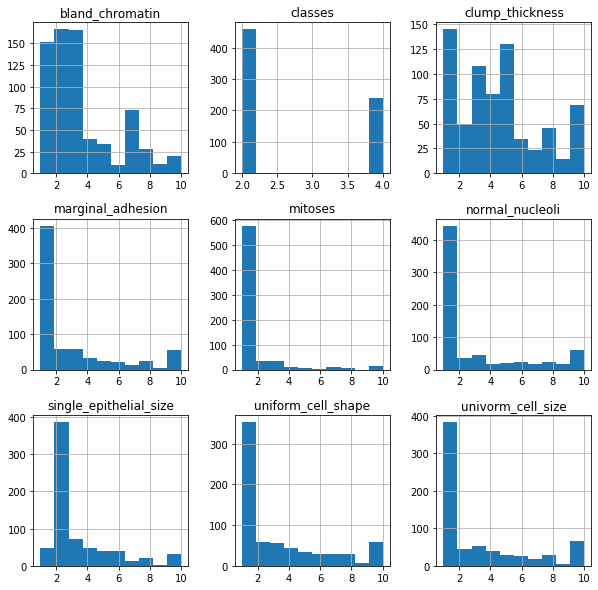

In [57]:
# plot histograms for each variable
df.hist(figsize = (10,10))
plt.show()


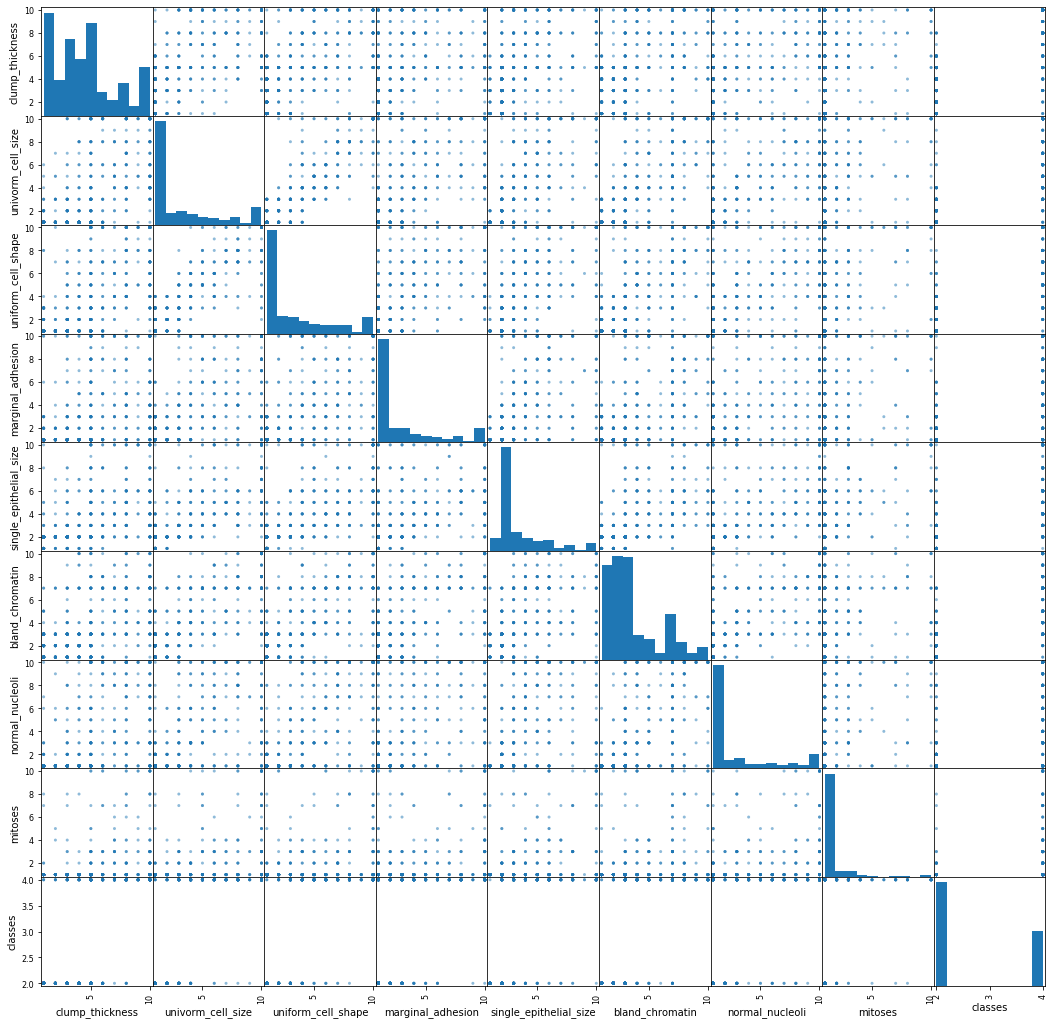

In [58]:
# creatr scatter plot matrix

scatter_matrix(df,figsize = (18,18))
plt.show()

In [71]:
x= np.array(df.drop(['classes'],1))
y = np.array(df['classes'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [72]:
#Specify testing options

seed = 8
scoring = 'accuracy'

In [73]:
#define the models to train

models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits = 10,random_state = seed)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.967792 (0.022315)
SVM: 0.955292 (0.025546)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu